# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## 1. How many Legendary Pokemon are there? ( 1pt )

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
pokemon = pd.read_csv('data/pokemon.csv')

In [23]:
pokemon.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [24]:
pokemon.isLegendary.value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

**There are `46` legendary pokemons in the dataset.**
____

## 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) (3pts)

Create a new column which is equal to the ratio of `Attack` and `HP`.

In [25]:
pokemon['A2HP'] = pokemon['Attack']/pokemon['HP']

In [26]:
pokemon[pokemon['A2HP'] == pokemon.A2HP.max()]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,A2HP
291,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,...,False,NaN,Mineral,NaN,False,0.79,1.2,45,head_base,90.0


**`Shedinja` is the pokemon with the highest attack-to-HP ratio equal to 90.**
____

## 3. Build a binary classifier for whether Pokemon are Fire Type or not. (4pts)

There are two columns (`Type_1` and `Type_2`) in the dataset that can tell whether a pokemon is fire type or not.

In [27]:
(pokemon.Type_1.unique())

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [28]:
(pokemon.Type_2.unique())

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

Create new column `isFire` based on whether `Type_1` or `Type_2` is equal to *Fire*.

In [29]:
pokemon['isFire'] = list(map(lambda x,y: 1 if (x == 'Fire' or y == 'Fire') else 0, pokemon.Type_1, pokemon.Type_2))

Count how many of the pokemons are fire type:

In [30]:
pokemon.isFire.value_counts()

0    665
1     56
Name: isFire, dtype: int64

Confirm this from columns `Type_1` and `Type_2`:

In [31]:
sum(pokemon.Type_1 == 'Fire') + sum(pokemon.Type_2 == 'Fire')

56

**This is the resulting dataframe with the fire type classifier column:**

In [32]:
pokemon.sample(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,A2HP,isFire
396,397,Staravia,Normal,Flying,340,55,75,50,40,40,...,0.500,Flying,NaN,False,0.61,15.5,120,two_wings,1.363636,0
520,521,Unfezant,Normal,Flying,488,80,115,80,65,55,...,0.500,Flying,NaN,False,1.19,29.0,45,two_wings,1.437500,0
690,691,Dragalge,Poison,Dragon,494,65,75,90,97,123,...,0.500,Water_1,Dragon,False,1.80,81.5,55,head_base,1.153846,0
154,155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,...,0.875,Field,NaN,False,0.51,7.9,45,bipedal_tailless,1.333333,1
492,493,Arceus,Normal,NaN,720,120,120,120,120,120,...,NaN,Undiscovered,NaN,False,3.20,320.0,3,quadruped,1.000000,0
345,346,Cradily,Rock,Grass,495,86,81,97,81,107,...,0.875,Water_3,NaN,False,1.50,60.4,45,head_base,0.941860,0
572,573,Cinccino,Normal,NaN,470,75,95,60,65,60,...,0.250,Field,NaN,False,0.51,7.5,60,quadruped,1.266667,0
584,585,Deerling,Normal,Grass,335,60,60,50,40,50,...,0.500,Field,NaN,False,0.61,19.5,190,quadruped,1.000000,0
390,391,Monferno,Fire,Fighting,405,64,78,52,78,52,...,0.875,Field,Human-Like,False,0.89,22.0,45,bipedal_tailed,1.218750,1
275,276,Taillow,Normal,Flying,270,40,55,30,30,30,...,0.500,Flying,NaN,False,0.30,2.3,200,two_wings,1.375000,0


____

## 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. (5pts)

In [33]:
pokemon = pd.read_csv('data/pokemon.csv')

In [34]:
pokemon.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [35]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [36]:
df1 = pokemon[pokemon.isLegendary == True][['Total','HP','Attack','Defense','Sp_Atk', 'Sp_Def', 'Speed', 'Weight_kg', 'Height_m','Catch_Rate','Pr_Male']]

In [37]:
df1.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Weight_kg,Height_m,Catch_Rate,Pr_Male
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,6.00000
mean,620.217391,94.000000,108.608696,101.586957,113.891304,106.543478,95.586957,201.797826,2.449565,6.652174,0.75000
std,44.993290,18.808981,23.536712,26.525104,25.432462,27.236174,20.436977,197.172328,1.723660,11.965167,0.41833
min,580.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.300000,0.200000,3.000000,0.00000
25%,580.000000,80.000000,90.000000,90.000000,96.250000,90.000000,90.000000,56.550000,1.500000,3.000000,0.62500
50%,600.000000,91.000000,107.500000,100.000000,117.500000,100.000000,99.000000,196.500000,1.960000,3.000000,1.00000
75%,677.500000,103.750000,123.750000,118.750000,130.000000,120.000000,108.000000,293.750000,3.200000,3.000000,1.00000
max,720.000000,150.000000,160.000000,200.000000,154.000000,200.000000,150.000000,950.000000,7.010000,45.000000,1.00000


<AxesSubplot:title={'center':'Boxplot'}>

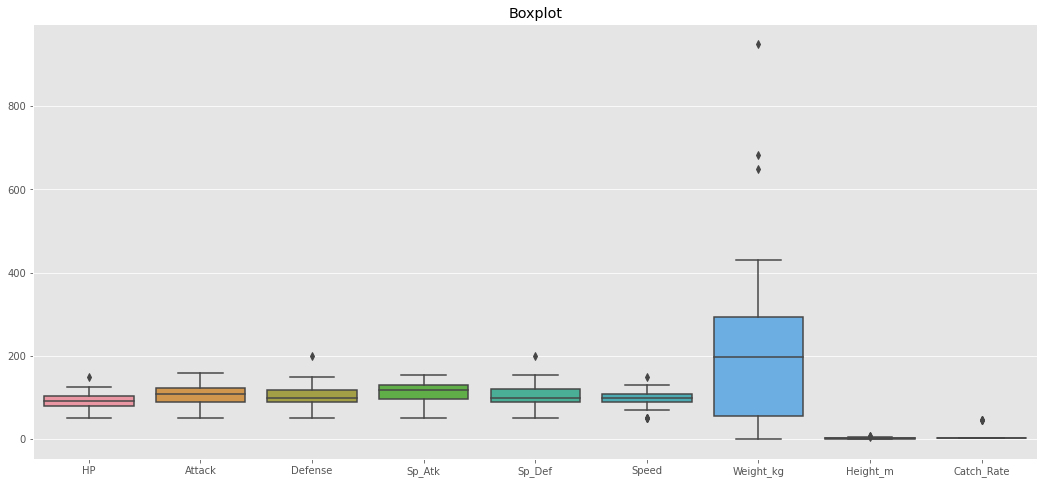

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.title('Boxplot')
sns.boxplot(data=pokemon[pokemon.isLegendary == True][['HP','Attack','Defense','Sp_Atk', 'Sp_Def', 'Speed','Weight_kg','Height_m','Catch_Rate']])